# Exploratory Data Analysis of the EEG Dataset

 The goal of this notebook is to:
 
 * Walk myself through the dataset
 * Getting my hands dirty on it
 * Extract some insights

## Import all the text file. Merge them and create one csv files 

## 1. About the Dataset

* The original dataset, as it was uploaded, consists of 5 different folders.

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


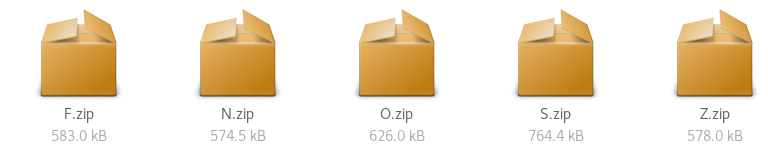

In [1]:
from IPython.display import Image
Image('/home/cyrillefeudjio/Documents/LDA and QDA/figures/Raw_folders.png',width=600)

* Each folder contains 100 files


* Each file in the folder represents data about a single subject/person. 

* The content of eachfile is a recording of brain activity for 23.6 seconds, 

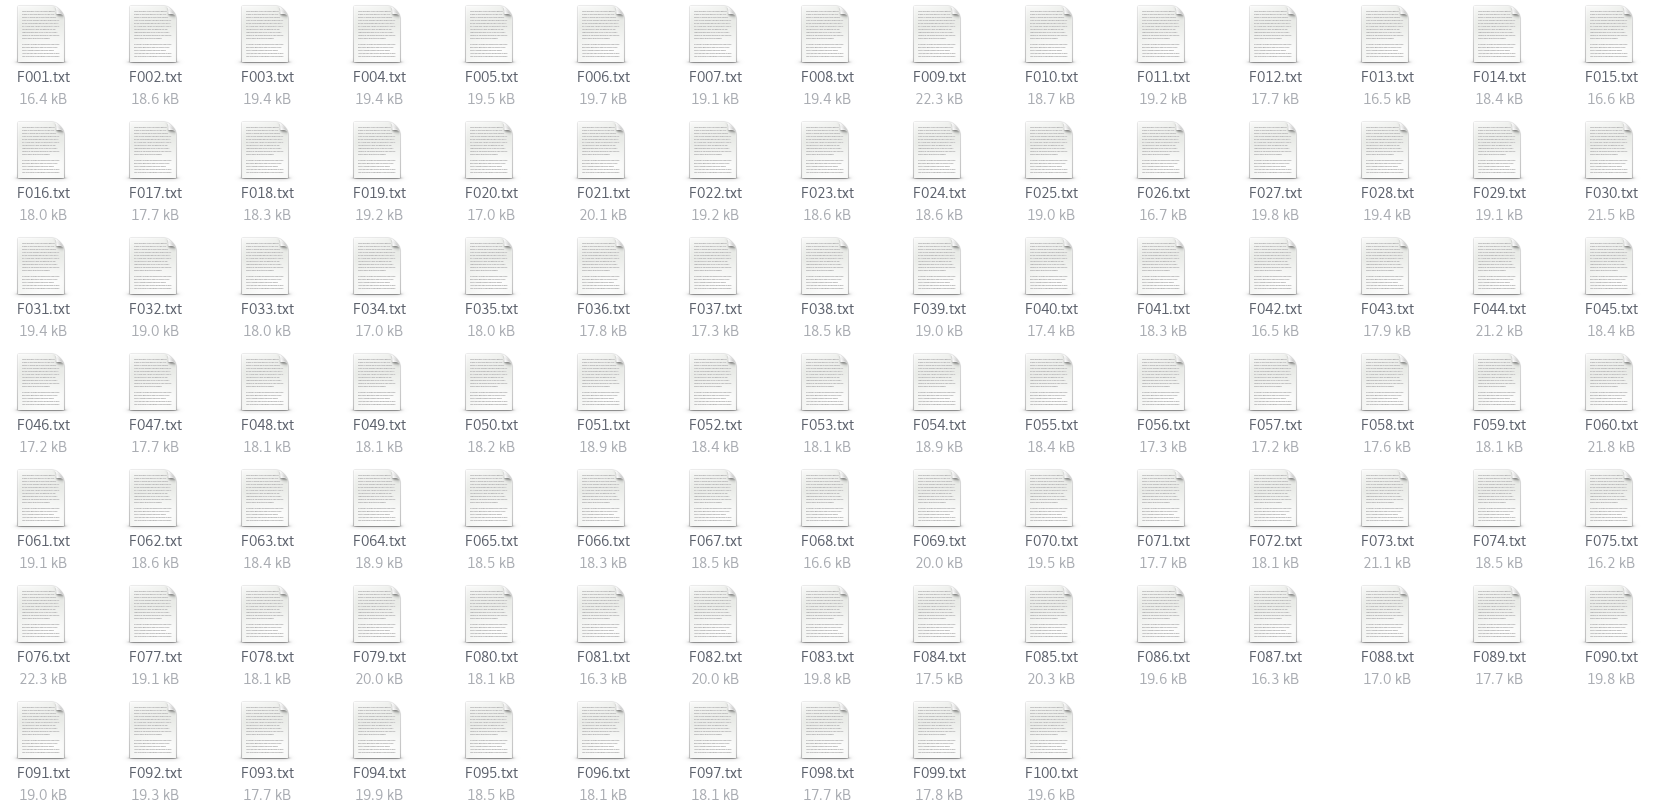

In [2]:
Image('/home/cyrillefeudjio/Documents/LDA and QDA/figures//All_files.png' ,
      width=800)

* Each recording can be represented as a time-series


Therefore, 

* The corresponding time-series is sampled into 4097 data points.

* Each data point is the value of the EEG recording at a different point in time. 

So we have a total of 500 individuals with each has 4097 data points for 23.5 seconds.

## 2. Data Preparation

The next step is to import all the files, merge them and generate one "big" csv file.

But let's first import all the dependancies

###  2.1 Importation of the libraries


In [3]:

#======== To navigate through folders and files as a whole ============ 
from os import chdir
from glob import glob

#======== for data analysis ==================
import pandas as pd
import numpy as np

#======== for data visualization
import matplotlib.pyplot as plt
%matplotlib inline


### 2.2  Creation of Helper Functions

In [4]:

def produceOneCSV(list_of_files, output_file):
    
    """This function takes as arguments the list of files of the
    same type, concatenate them and produce a single csv file
    """
    # Consolidate all CSV files into one object
    result_obj_1 = pd.concat([pd.read_csv(file,header=None) for file in list_of_files],
                            axis=1)
    # Convert the above object into a csv file and export
    result_obj_1.to_csv(output_file, index=False, encoding="utf-8")
    
    #return result_obj_1

In [5]:
def Names_transpose(Names, output_file):
    """This functions takes a dataframe and columns names,
    transpose it and attribute the names accordingly and 
    returns the transposed dataframe"""
    data = pd.read_csv('data_merge1.csv')
    data.columns= list_of_files
    return data.T

### 2.3 Data Cleaning

**Step1: Putting all the text files together**

In [6]:
#=============================== path to the data in my computer ======================
txt_file_path = "/home/cyrillefeudjio/Documents/LDA and QDA/ALL"

#change to the folder of interest
chdir(txt_file_path)

#List all txt files in the working dir
list_1 = [file for file in glob('*.txt')]
list_2 = [file for file in glob('*.TXT')]
list_of_files = list_1 + list_2

#list to define the class
list_2=[list[0] for list in list_of_files]

# define the name of the output file
output_file = "data_merge1.csv"


**Step2: Merging and transposing the data**

In [7]:
produceOneCSV(list_of_files, output_file)

In [8]:
df=Names_transpose(list_of_files, output_file)

#define a column for different class
df['class'] = list_2
df['class']=df['class']=='S'
df['class'] = df['class'].astype(int)

#data without shuffle
df.to_csv("Data_Merge_1.csv", index=False, encoding="utf-8")

#shuffle the rows
df = df.sample(frac=1).reset_index(drop=True)

#save the final data
df.to_csv("Data_Merge_2.csv", index=False, encoding="utf-8")

The data are now tidy.

* Each raw correspond to one patient 
* Each column is the record of brain activity every 0.005 second consecutively. 

### 2.4 Loading the tidy data

Here, we import the data and check the prevalence of the positive class

For simplicity sake, a **Class** Column has been added

* All the subjects that has been diagnosted epileptic are encoded as 1
* Those who have not are encoded as 0. 

In [9]:
df1=pd.read_csv("Data_Merge_2.csv")
# separate the predictor and response variables from the dataset
collist = df1.columns.tolist()
cols_input = collist[0:4096]
df1 = df1[cols_input + ["class"]]
df1.head(15)

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,class
0,-54,-74,-89,-106,-111,-104,-88,-64,-59,-48,...,-73,-29,6,28,53,69,72,27,-56,0
1,23,19,10,8,0,-6,-13,-17,-33,-44,...,6,27,51,70,85,92,94,88,77,0
2,29,20,-8,-39,-74,-97,-103,-95,-68,-41,...,-28,16,53,66,68,71,64,55,33,0
3,39,36,35,35,34,29,24,19,17,17,...,-7,-5,4,5,4,4,-1,8,9,0
4,-42,-39,-35,-35,-36,-37,-37,-39,-36,-22,...,11,-12,-22,-25,-21,-22,-29,-37,-40,0
5,13,6,-1,-13,-29,-42,-53,-71,-86,-94,...,-75,-37,36,86,139,167,175,161,129,0
6,90,108,108,96,76,32,-15,-63,-102,-133,...,-1,-13,-18,-13,-6,16,32,43,48,0
7,-112,-100,-107,-114,-151,-134,-104,-53,-35,-60,...,154,151,139,172,170,144,136,81,64,0
8,-55,-64,-91,-92,-80,-84,-67,-49,-33,-41,...,-1,-6,3,23,50,98,73,67,35,0
9,127,160,166,149,120,86,42,-14,-63,-107,...,-76,-126,-147,-133,-103,-67,-23,3,36,0


In [10]:
# Calculate the prevalence of the positive class which is the percentage of our samples that has the characteristic 
#we are trying to predict
def calc_prevalence(f):
    """this function calculates the prevalence of the positive class (label = 1)"""
    return sum(f) / len(f)

p=calc_prevalence(df1["class"].values)
print("prevalence of the positive class:",p)

prevalence of the positive class: 0.2


### 2.5 Data visualization

This part consists on having a view at the signal recordind of some patients, spread over the 23.6 seconds

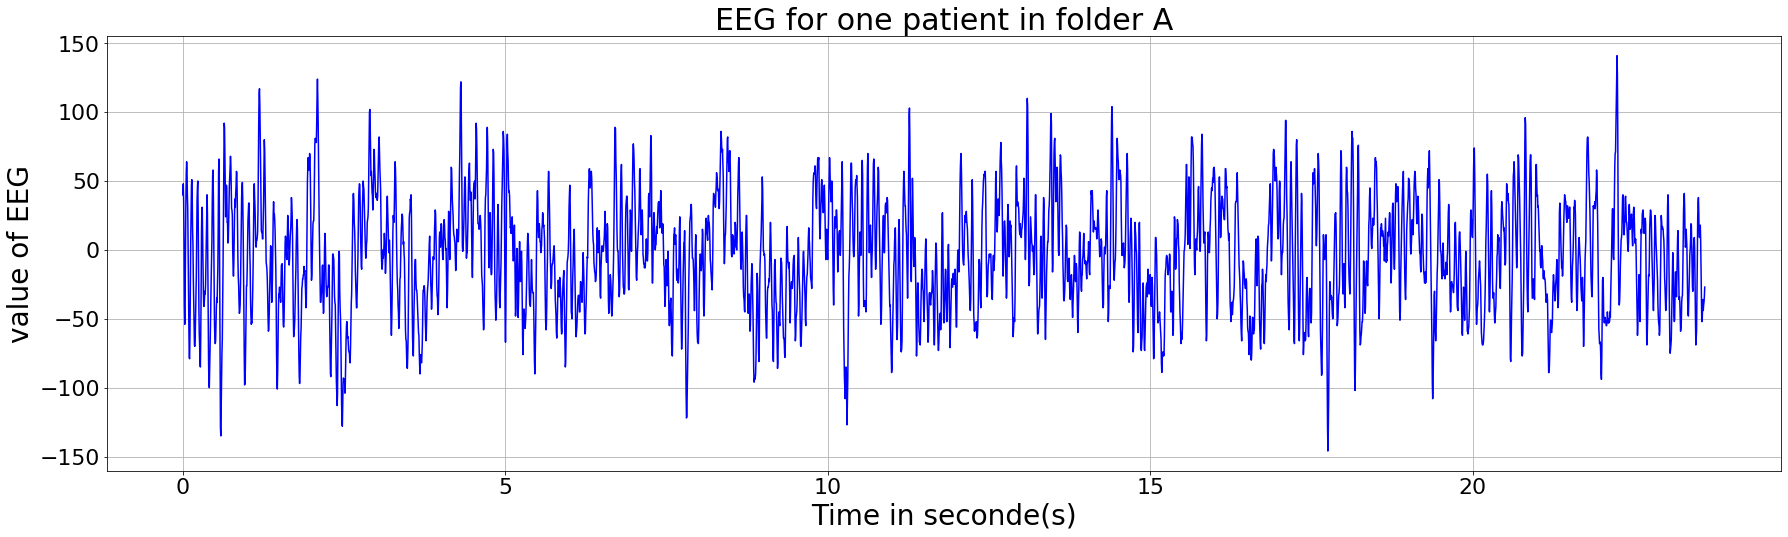

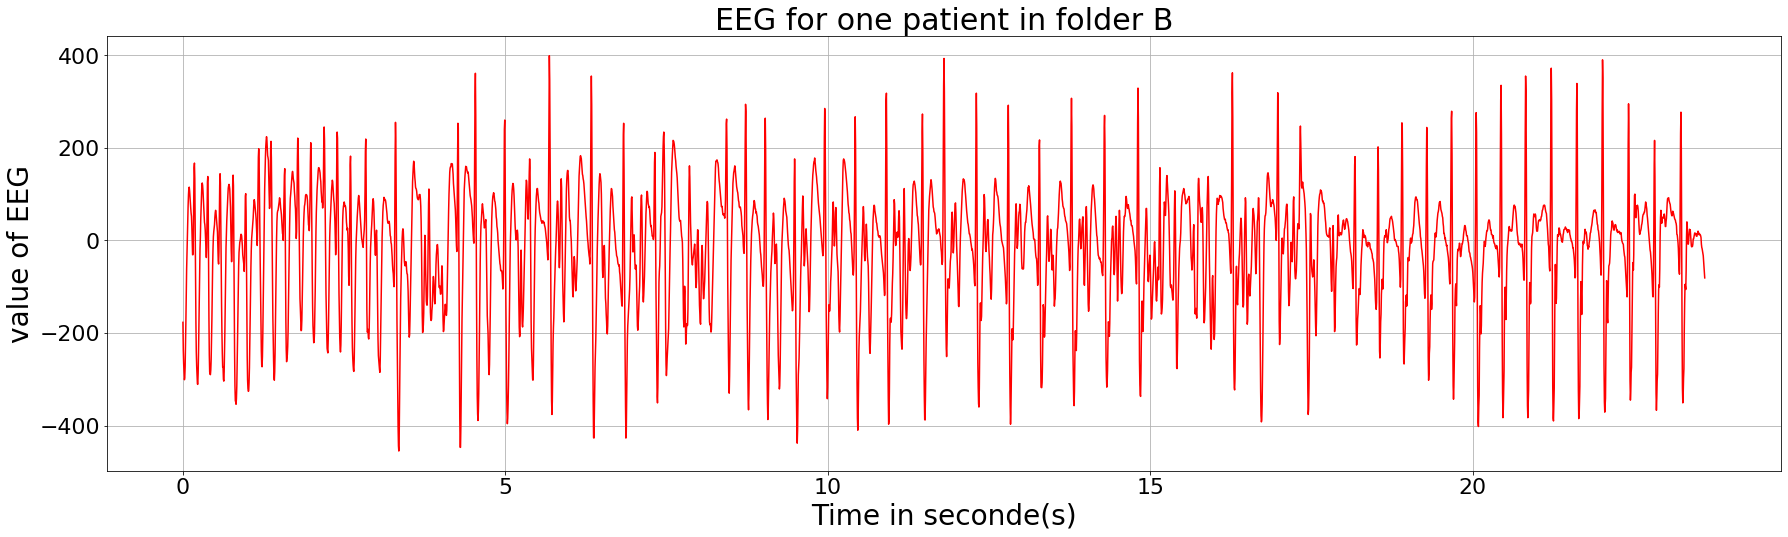

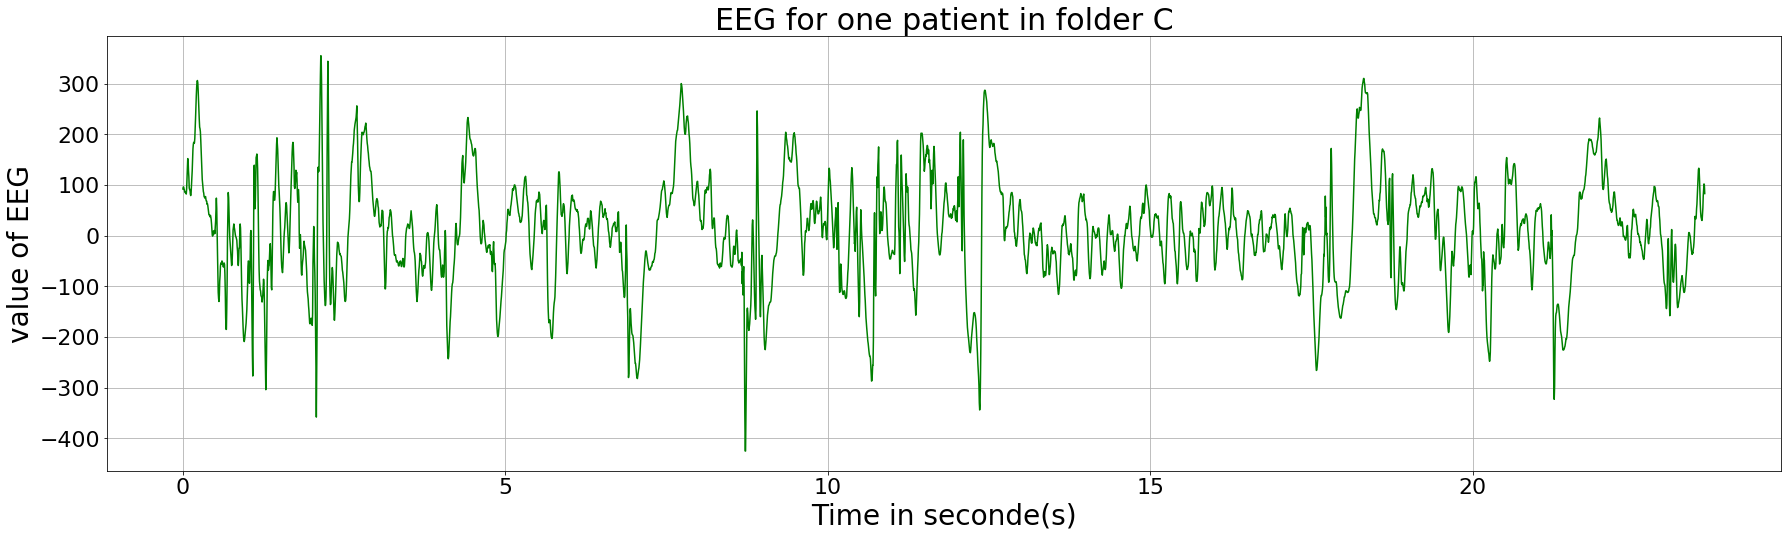

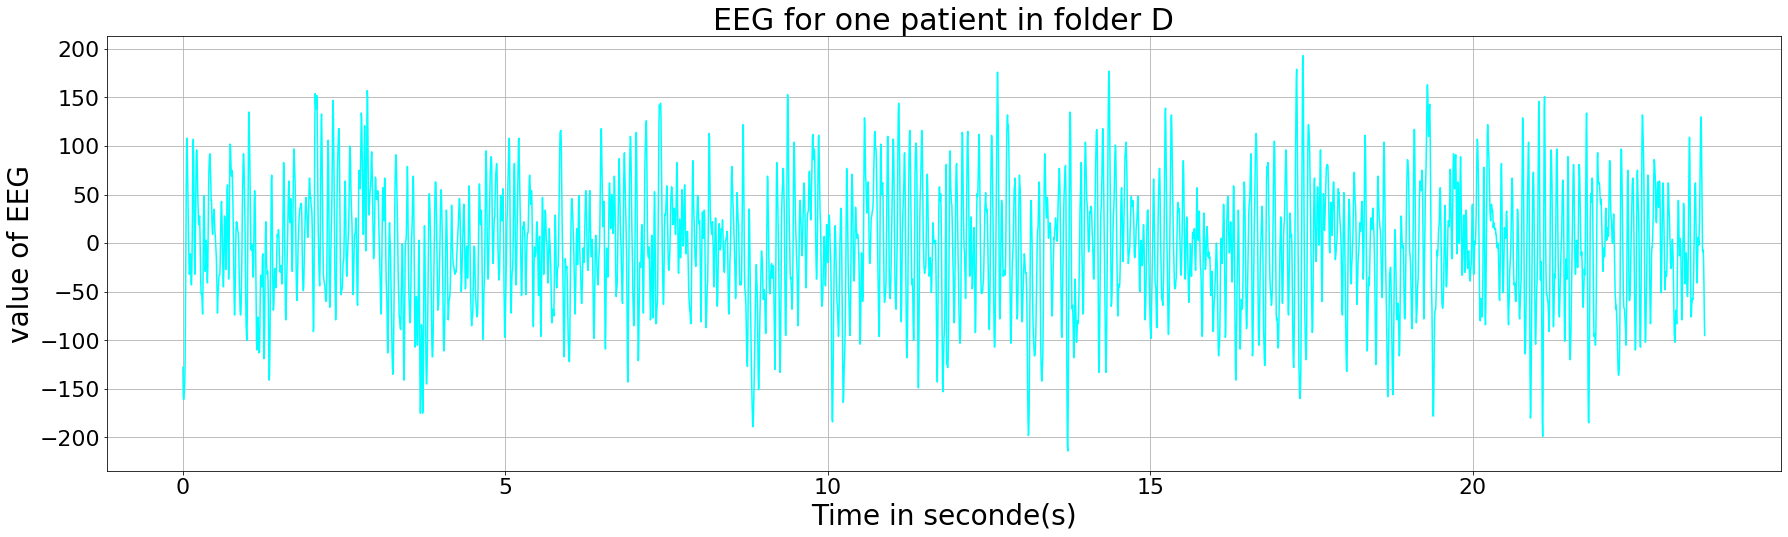

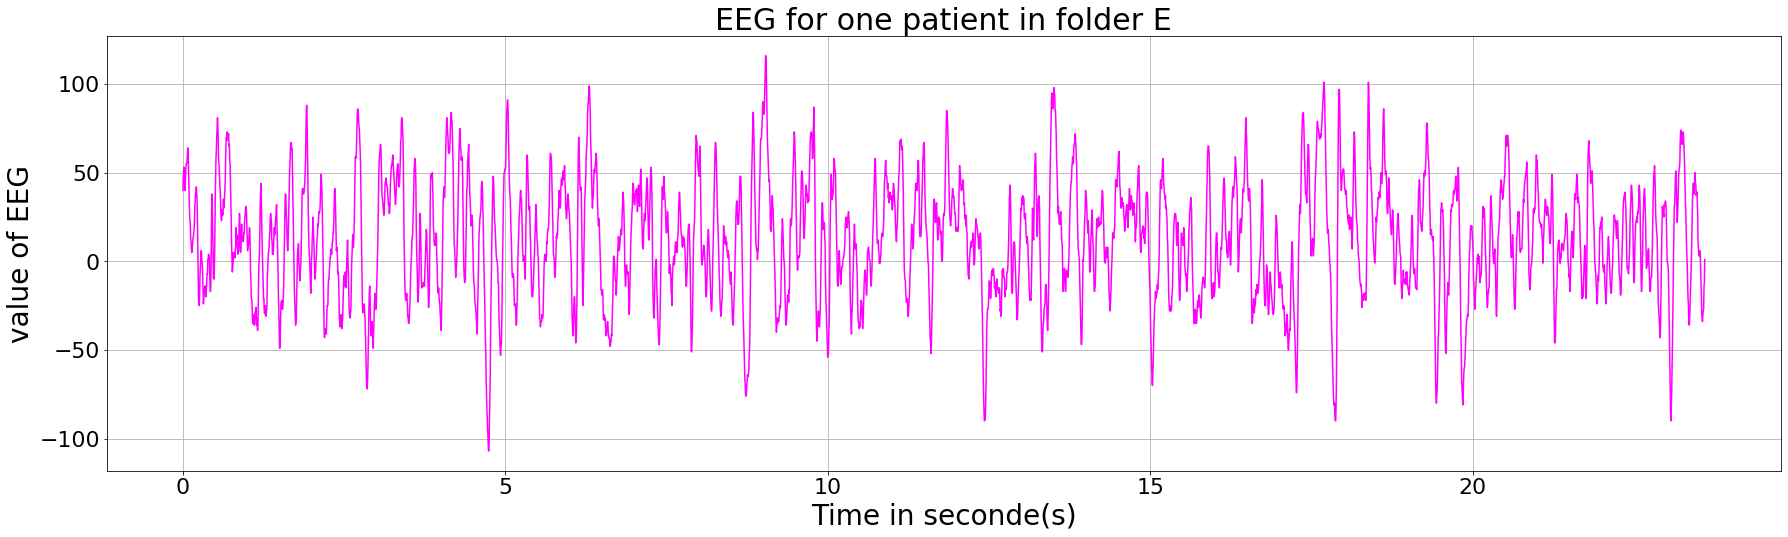

In [11]:
data=pd.read_csv("Data_Merge_1.csv")
t=np.linspace(0,23.6,4096)
list_f=["A","B","C","D","E"]
cols =  ['blue' , 'red' , 'green' , 'cyan' , 'magenta']
#plt.figure(figsize=(30,50))
for i in range(5):
    y=data.loc[20*i+100*i][0:4096]
    #font = {'family' : 'normal','weight' : 'bold','size'   : 22}
    #plt.rc('font', **font)
    plt.figure(i+1,figsize=(30,8))
    plt.rc('font', size=22)          # controls default text sizes
    plt.rc('axes', titlesize=30)     # fontsize of the axes title
    plt.rc('axes', labelsize=28)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=22)    # fontsize of the tick labels
    plt.plot(t,y ,cols[i])
    plt.title ("EEG for one patient in folder "+list_f[i] )
    plt.xlabel ('Time in seconde(s)')
    plt.ylabel('value of EEG')
    plt.grid(axis="both")
    

From the graphs above, we can clearly observe that it is not possible 
to make a difference between a sick and a healthy patient.


We will then try to see if we can group the information per second.

But prior to that, let's have a look at the brain activity of 5 different patients over 1 second,

to see how the activity evolves.

**Brain activity over 1 second for 5 different patients**

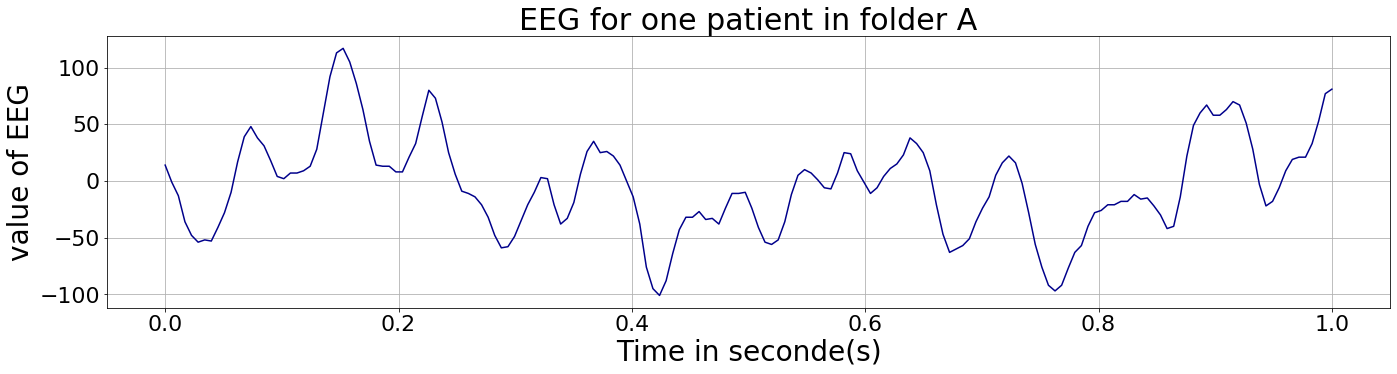

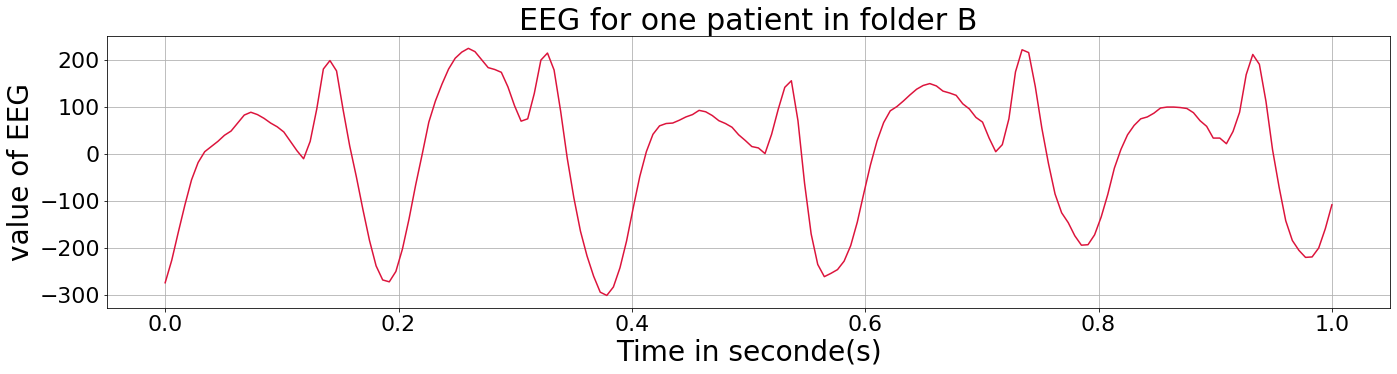

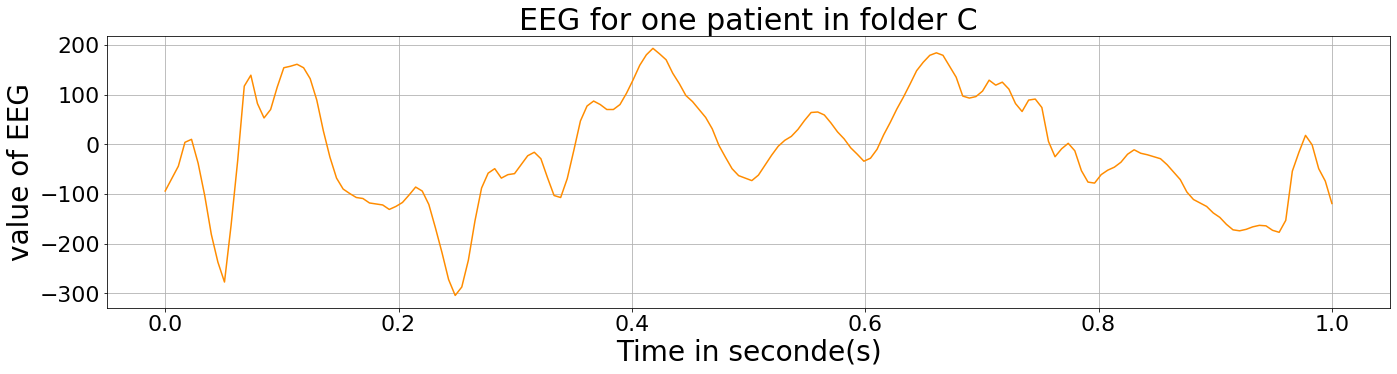

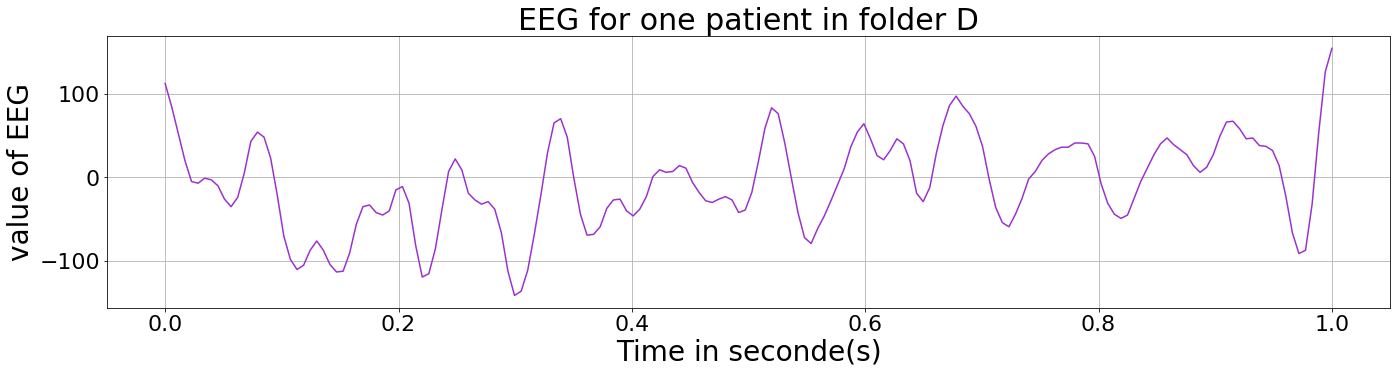

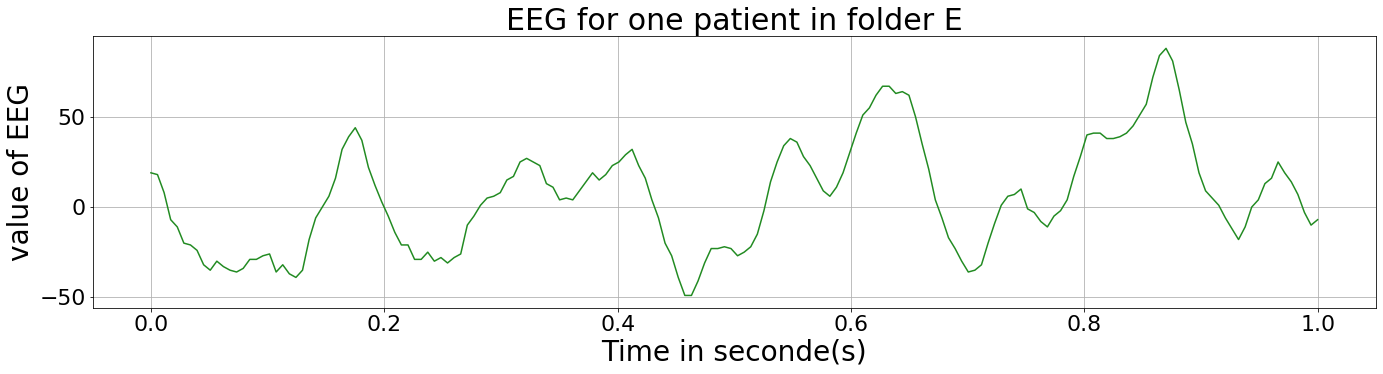

In [12]:
t=np.linspace(0,1,178)
list_f=["A","B","C","D","E"]
cols = ['darkblue', 'crimson' ,'darkorange', 'darkorchid' , 'forestgreen']
#plt.figure(figsize=(30,50))
for i in range(5):
    y=data.loc[20*i+100*i][179:357]
    #font = {'family' : 'normal','weight' : 'bold','size'   : 22}
    #plt.rc('font', **font)
    plt.figure(i+1,figsize=(23,5))
    plt.rc('font', size=22)          # controls default text sizes
    plt.rc('axes', titlesize=30)     # fontsize of the axes title
    plt.rc('axes', labelsize=28)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=22)    # fontsize of the tick labels
    plt.plot(t,y , cols[i])
    plt.title ("EEG for one patient in folder "+list_f[i] )
    plt.xlabel ('Time in seconde(s)')
    plt.ylabel('value of EEG')
    plt.grid(axis="both")

We can see that there is a lot of variation, which shows that the signal is very unstable.

This is perhaps a sign that **aggregating** the information per second does convey that much information


**Aggregation of multiple signal per second**

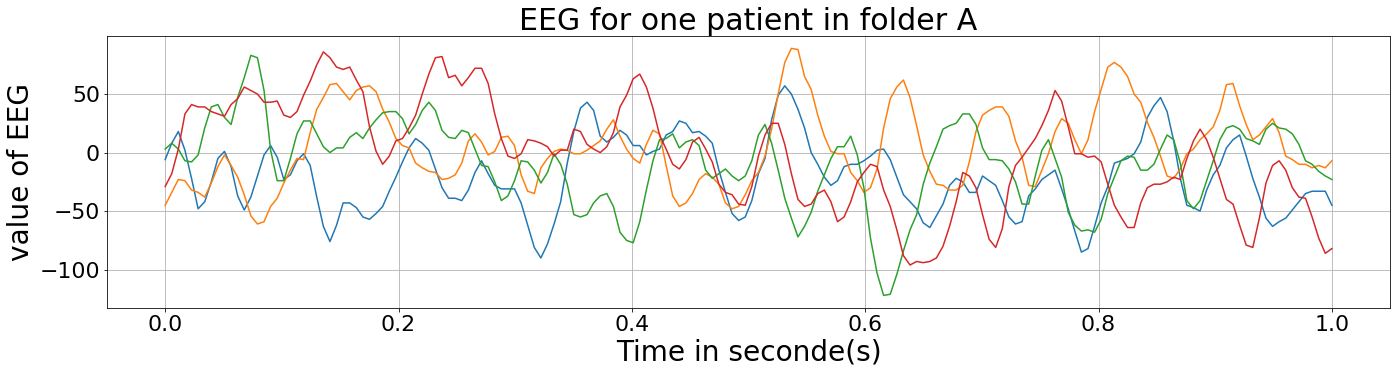

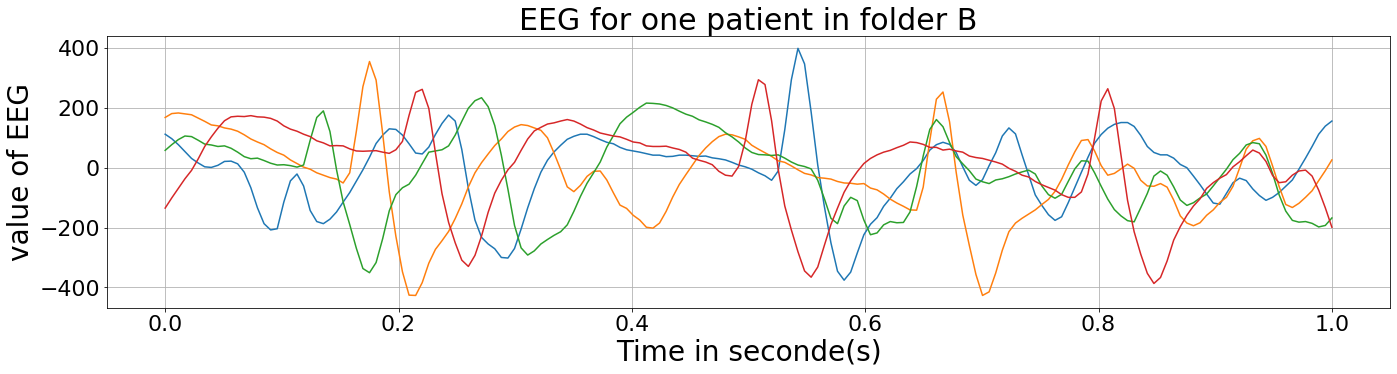

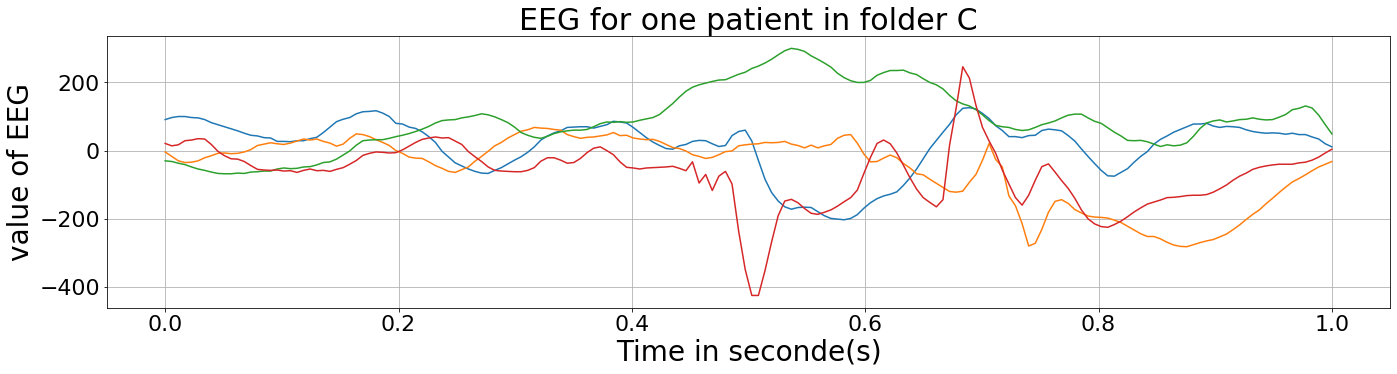

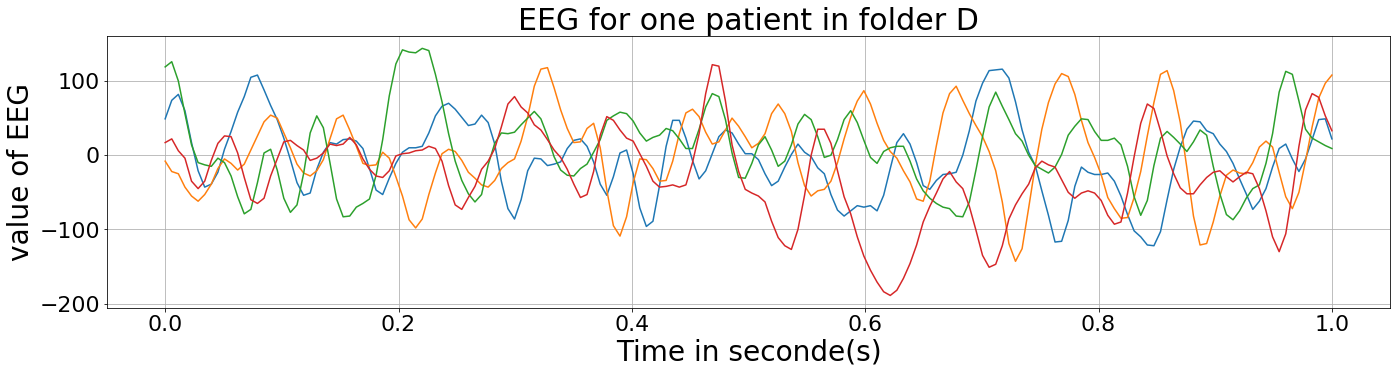

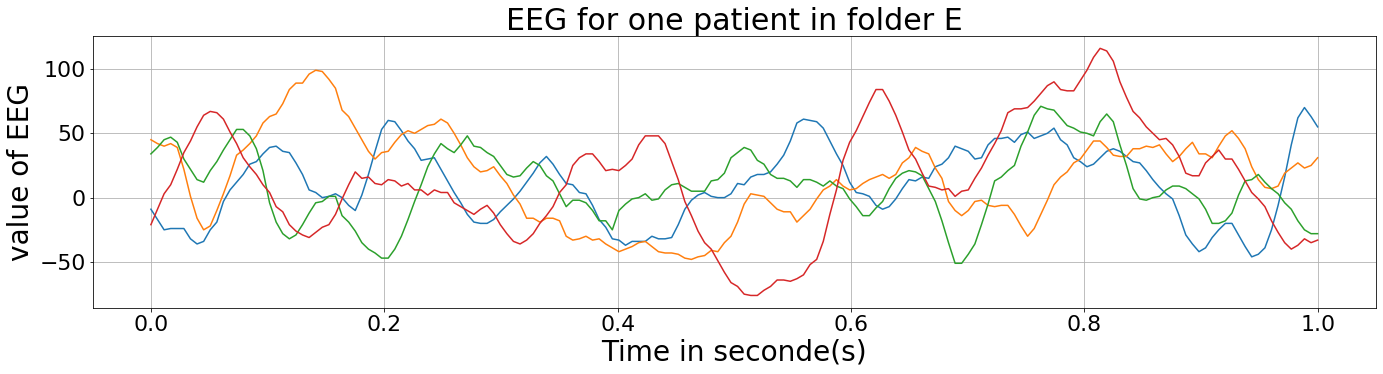

In [13]:
t=np.linspace(0,1,178)
list_f=["A","B","C","D","E"]
#plt.figure(figsize=(30,50))
for i in range(5):
    plt.figure(i+1,figsize=(23,5))
    plt.grid()
    for j in range(5,9):
        y=data.loc[20*i+100*i][178*j:178*(j+1)]
        plt.rc('font', size=22)          # controls default text sizes
        plt.rc('axes', titlesize=30)     # fontsize of the axes title
        plt.rc('axes', labelsize=28)    # fontsize of the x and y labels
        plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
        plt.rc('ytick', labelsize=22)    # fontsize of the tick labels
        plt.plot(t,y)
        
        plt.title ("EEG for one patient in folder "+list_f[i] )
        plt.xlabel ('Time in seconde(s)')
        plt.ylabel('value of EEG')
        plt.grid(axis="both")

* In the graph above we try to check the periodicity for one seconde. we plot 4 differents second of one patient in the same graph.   


* each graph correspond to one patent of one folder.  


* We observe that there is no superposition, so the signal is no periodique. It is better to keep the data without change anything.

###  Here we try to investigate the meaning of having the value of EEG at 0.  


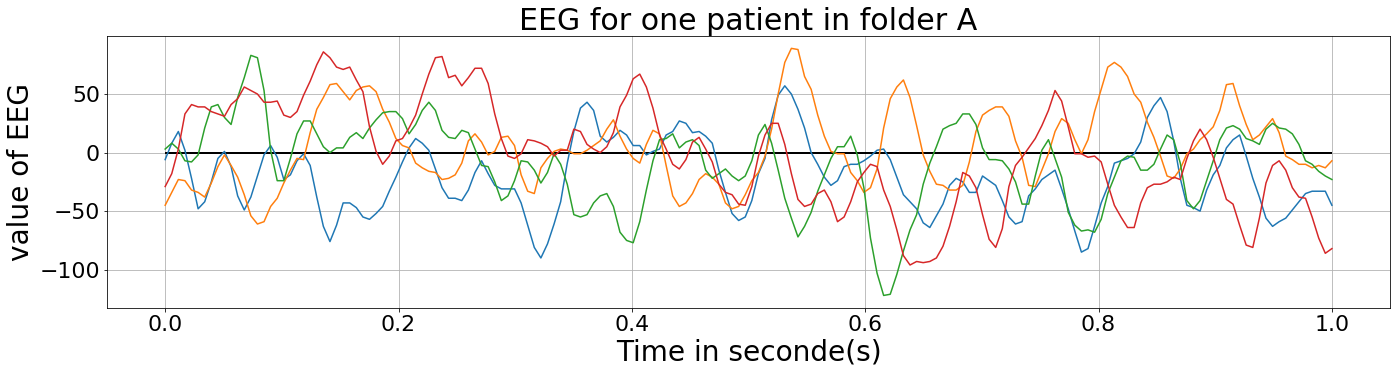

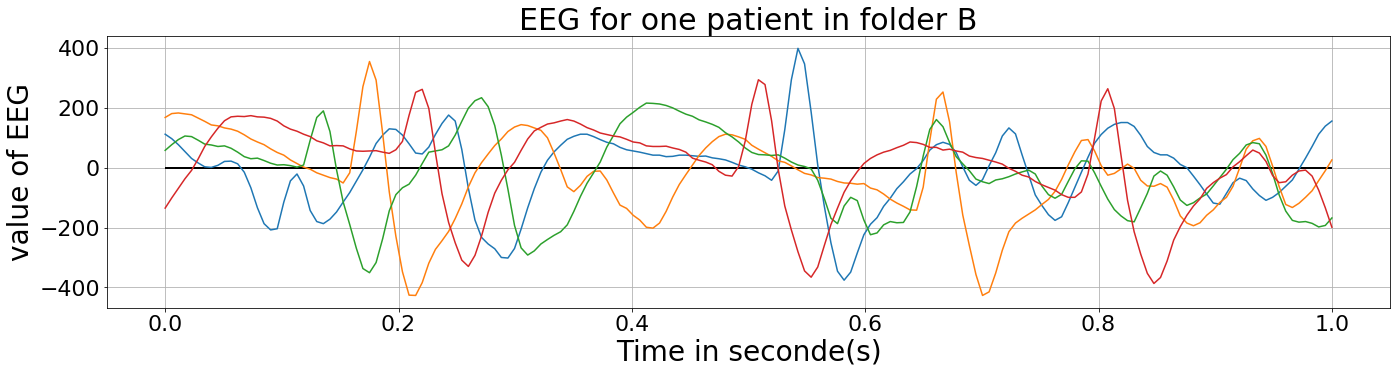

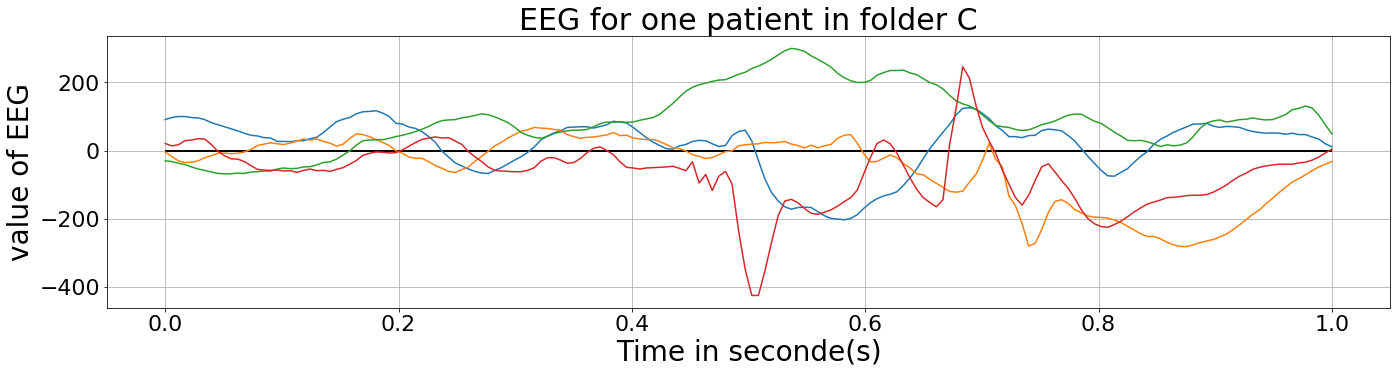

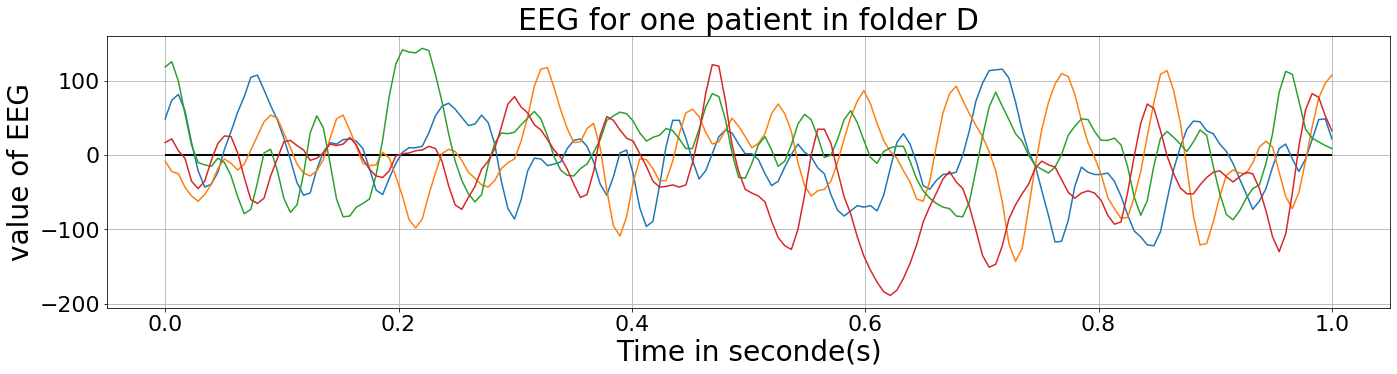

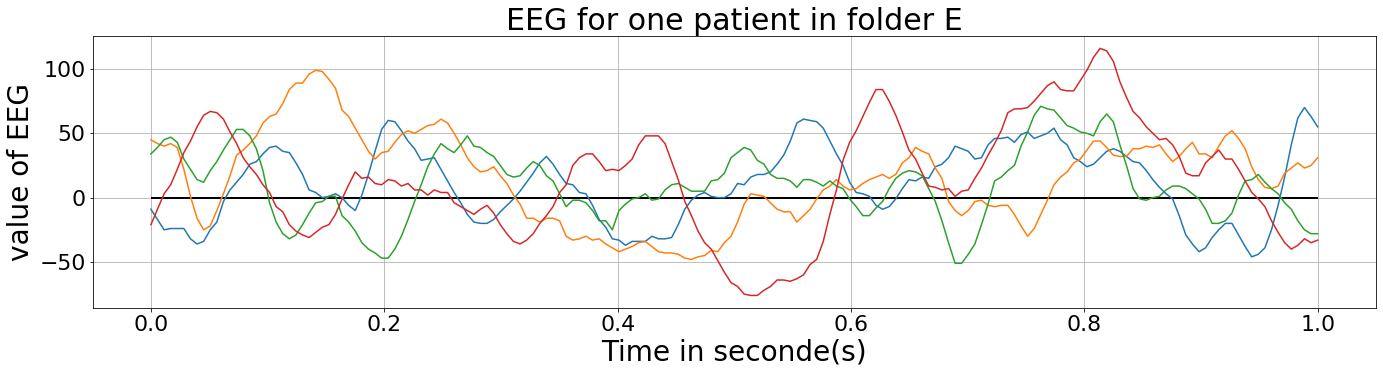

In [14]:
t=np.linspace(0,1,178)
list_f=["A","B","C","D","E"]
#plt.figure(figsize=(30,50))
for i in range(5):
    plt.figure(i+1,figsize=(23,5))
    plt.grid()
    for j in range(5,9):
        y=data.loc[20*i+100*i][178*j:178*(j+1)]
        plt.rc('font', size=22)          # controls default text sizes
        plt.rc('axes', titlesize=30)     # fontsize of the axes title
        plt.rc('axes', labelsize=28)    # fontsize of the x and y labels
        plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
        plt.rc('ytick', labelsize=22)    # fontsize of the tick labels
        plt.plot(t,y)
        plt.hlines(0 ,xmin=0 , xmax=1)
        plt.title ("EEG for one patient in folder "+list_f[i] )
        plt.xlabel ('Time in seconde(s)')
        plt.ylabel('value of EEG')
        plt.grid(axis="both")